# Análise dos Indicadores de Fluxo de Alunos do Ensino Superior do Rio Grande do Norte

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from IPython.display import display
import dataframe_image as dfi


## Manipulação/Tratamento dos Dados

### Leitura dos Dados

In [28]:
df = pd.read_csv('base.csv').drop(0)

### Seleção dos Atributos da Análise

In [29]:
colunas_selecionadas = [
    'Grau Acadêmico', 
    'Modalidade de Ensino', 
    'Nome do Curso de Graduação',
    'Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 
    'Ano de Referência',
    'Quantidade de Ingressantes no Curso', 
    'Quantidade de Concluintes no Curso no ano de referência', 
    'Quantidade de Desistência no Curso no ano de referência'
]
df = df[colunas_selecionadas]

In [16]:
df

,Grau Acadêmico,Modalidade de Ensino,Nome do Curso de Graduação,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Referência,Quantidade de Ingressantes no Curso,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Grau Acadêmico Nome
1,1,1,ADMINISTRAÇÃO,"Negócios, administração e direito",2019,54,0,3,NaN
2,1,1,ADMINISTRAÇÃO,"Negócios, administração e direito",2020,54,0,7,NaN
3,1,1,ADMINISTRAÇÃO,"Negócios, administração e direito",2021,54,0,1,NaN
4,1,1,ADMINISTRAÇÃO,"Negócios, administração e direito",2022,54,0,9,NaN
5,1,1,ADMINISTRAÇÃO,"Negócios, administração e direito",2023,54,8,0,NaN
...,...,...,...,...,...,...,...,...,...
1911,1,1,ENFERMAGEM,Saúde e bem-estar,2019,42,0,0,NaN
1912,1,1,ENFERMAGEM,Saúde e bem-estar,2020,42,0,3,NaN
1913,1,1,ENFERMAGEM,Saúde e bem-estar,2021,42,0,1,NaN
1914,1,1,ENFERMAGEM,Saúde e bem-estar,2022,42,1,2,NaN


### Conversão/Limpeza de Dados

In [76]:

df['Quantidade de Ingressantes no Curso'] = pd.to_numeric(df['Quantidade de Ingressantes no Curso'], errors='coerce').astype('Int64')
df['Quantidade de Concluintes no Curso no ano de referência'] = pd.to_numeric(df['Quantidade de Concluintes no Curso no ano de referência'], errors='coerce').astype('Int64')
df['Quantidade de Desistência no Curso no ano de referência'] = pd.to_numeric(df['Quantidade de Desistência no Curso no ano de referência'], errors='coerce').astype('Int64')


## Análises

### Modalidade

In [54]:
# Frequência absoluta
frequencia_abs = df['Modalidade de Ensino'].value_counts()

# Frequência relativa (proporção em %)
frequencia_rel = df['Modalidade de Ensino'].value_counts(normalize=True) * 100

# Juntando em uma tabela
tabela_freq_modalidade= pd.DataFrame({
    'Frequência Absoluta': frequencia_abs,
    'Frequência Relativa (%)': frequencia_rel.round(2)
})

tabela_freq_modalidade = tabela_freq_modalidade.rename(index={
    '1': 'Presencial',
    '2': 'Remoto'
})

display(tabela_freq_modalidade)

,Frequência Absoluta,Frequência Relativa (%)
Modalidade de Ensino,,
Presencial,1590,83.03
Remoto,325,16.97


C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\1153698693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\1153698693.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentual = tabela_freq_modalidade['Frequência Relativa (%)'][index]


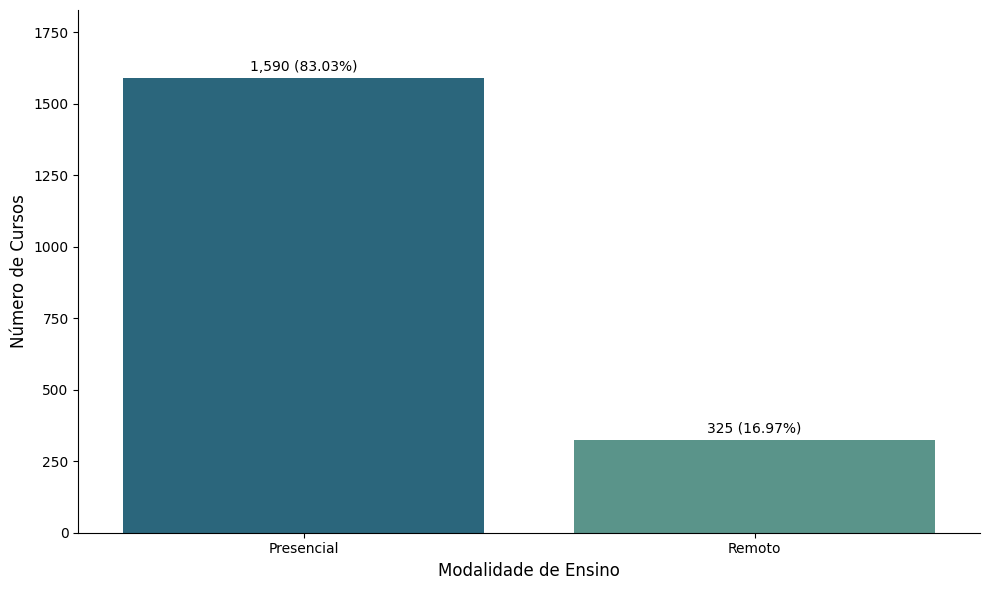

In [55]:
tabela_freq_modalidade= tabela_freq_modalidade.sort_values(by='Frequência Absoluta', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=tabela_freq_modalidade.index,
    y=tabela_freq_modalidade['Frequência Absoluta'],
    palette='crest_r'
)

# Adiciona rótulos com valores + percentuais
for index, value in enumerate(tabela_freq_modalidade['Frequência Absoluta']):
    percentual = tabela_freq_modalidade['Frequência Relativa (%)'][index]
    texto = f'{value:,.0f} ({percentual:.2f}%)'
    plt.text(index, value + max(tabela_freq_grau['Frequência Absoluta']) * 0.015, texto,
             ha='center', va='bottom', fontsize=10)

# Estética e ajustes
plt.ylabel('Número de Cursos', fontsize=12)
plt.xlabel('Modalidade de Ensino', fontsize=12)
plt.ylim(0, max(tabela_freq_modalidade['Frequência Absoluta']) * 1.15)
sns.despine()
plt.tight_layout()
plt.show()

In [10]:
freq_modalidade = pd.crosstab(
    index=df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL'],
    columns=df['Modalidade de Ensino']
).rename(columns={
    '1': 'Presencial',
    '2': 'Remoto'
})

display(tabela_freq_modalidade)

Modalidade de Ensino,Presencial,Remoto
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,
"Agricultura, silvicultura, pesca e veterinária",30,0
Artes e humanidades,70,30
"Ciências naturais, matemática e estatística",80,10
"Ciências sociais, comunicação e informação",115,5
Computação e Tecnologias da Informação e Comunicação (TIC),100,45
Educação,430,45
"Engenharia, produção e construção",180,35
"Negócios, administração e direito",255,100
Saúde e bem-estar,280,25


### Grau Acadêmico

In [5]:

grau_academico = df['Grau Acadêmico']
print(grau_academico)

1       1
2       1
3       1
4       1
5       1
       ..
1911    1
1912    1
1913    1
1914    1
1915    1
Name: Grau Acadêmico, Length: 1915, dtype: object


In [8]:
grau_academico_describe = grau_academico.describe()
print(grau_academico_describe)

count     1915
unique       3
top          1
freq      1045
Name: Grau Acadêmico, dtype: object


In [46]:
# Frequência absoluta
frequencia_abs = df['Grau Acadêmico'].value_counts()

# Frequência relativa (proporção em %)
frequencia_rel = df['Grau Acadêmico'].value_counts(normalize=True) * 100

# Juntando em uma tabela
tabela_freq = pd.DataFrame({
    'Frequência Absoluta': frequencia_abs,
    'Frequência Relativa (%)': frequencia_rel.round(2)
}).rename(columns={
    '1': 'Bacharelado',
    '2': 'Licenciatura',
    '3': 'Tecnológico'
})

print(tabela_freq)


                Frequência Absoluta  Frequência Relativa (%)
Grau Acadêmico                                              
1                              1045                    54.57
2                               475                    24.80
3                               395                    20.63


In [47]:
tabela_freq = tabela_freq.rename(index={
    '1': 'Bacharelado',
    '2': 'Licenciatura',
    '3': 'Tecnológico'
})

display(tabela_freq)

,Frequência Absoluta,Frequência Relativa (%)
Grau Acadêmico,,
Bacharelado,1045,54.57
Licenciatura,475,24.80
Tecnológico,395,20.63


In [16]:
freq_grau_academico = pd.crosstab(
    index=df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL'],
    columns=df['Grau Acadêmico']
).rename(columns={
    '1': 'Bacharelado',
    '2': 'Licenciatura',
    '3': 'Tecnológico'
})

freq_grau_academico 

Grau Acadêmico,Bacharelado,Licenciatura,Tecnológico
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,,
"Agricultura, silvicultura, pesca e veterinária",25,0,5
Artes e humanidades,45,0,55
"Ciências naturais, matemática e estatística",85,0,5
"Ciências sociais, comunicação e informação",120,0,0
Computação e Tecnologias da Informação e Comunicação (TIC),55,0,90
Educação,0,475,0
"Engenharia, produção e construção",185,0,30
"Negócios, administração e direito",210,0,145
Saúde e bem-estar,300,0,5


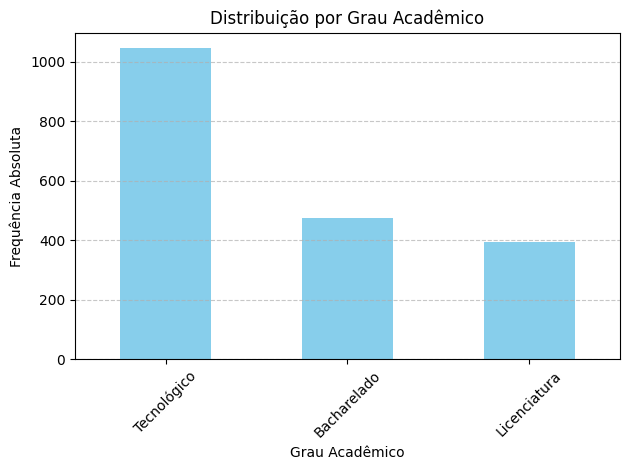

In [39]:
tabela_freq['Frequência Absoluta'].plot(kind='bar', color='skyblue')

plt.title('Distribuição por Grau Acadêmico')
plt.xlabel('Grau Acadêmico')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\2674407739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\2674407739.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentual = tabela_freq_grau['Frequência Relativa (%)'][index]


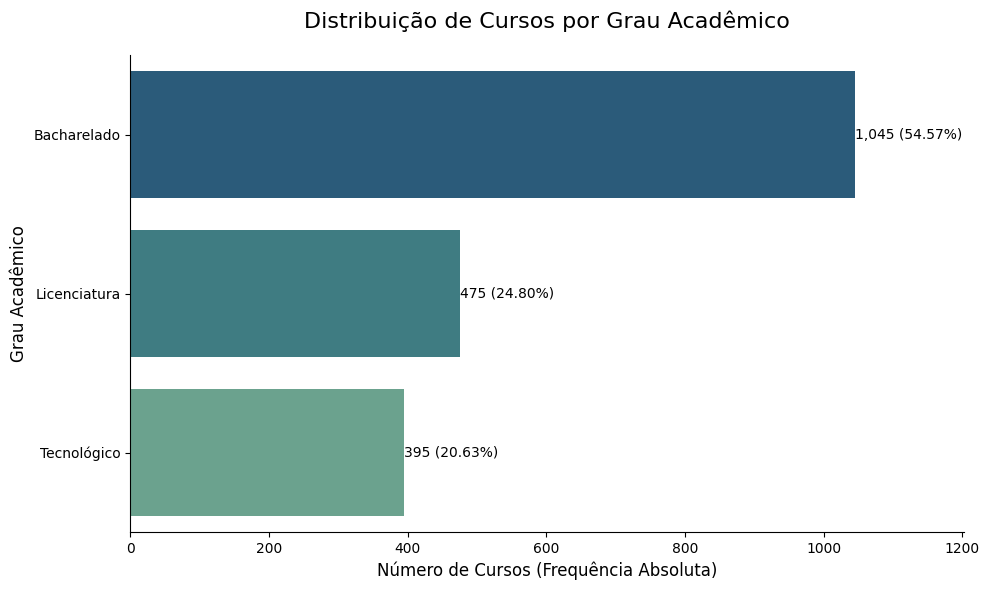

In [48]:
tabela_freq_grau = tabela_freq.sort_values(by='Frequência Absoluta', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=tabela_freq_grau['Frequência Absoluta'],
    y=tabela_freq_grau.index,
    palette='crest_r'  # Ou 'crest_r', 'viridis', etc
)

# Adiciona rótulos com valores + percentuais
for index, value in enumerate(tabela_freq_grau['Frequência Absoluta']):
    percentual = tabela_freq_grau['Frequência Relativa (%)'][index]
    texto = f'{value:,.0f} ({percentual:.2f}%)'
    plt.text(value, index, texto, va='center', fontsize=10)

# Estética e ajustes
plt.title('Distribuição de Cursos por Grau Acadêmico', fontsize=16, pad=20)
plt.xlabel('Número de Cursos (Frequência Absoluta)', fontsize=12)
plt.ylabel('Grau Acadêmico', fontsize=12)
plt.xlim(0, max(tabela_freq_grau['Frequência Absoluta']) * 1.15)
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\1848784786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\1848784786.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentual = tabela_freq_grau['Frequência Relativa (%)'][index]


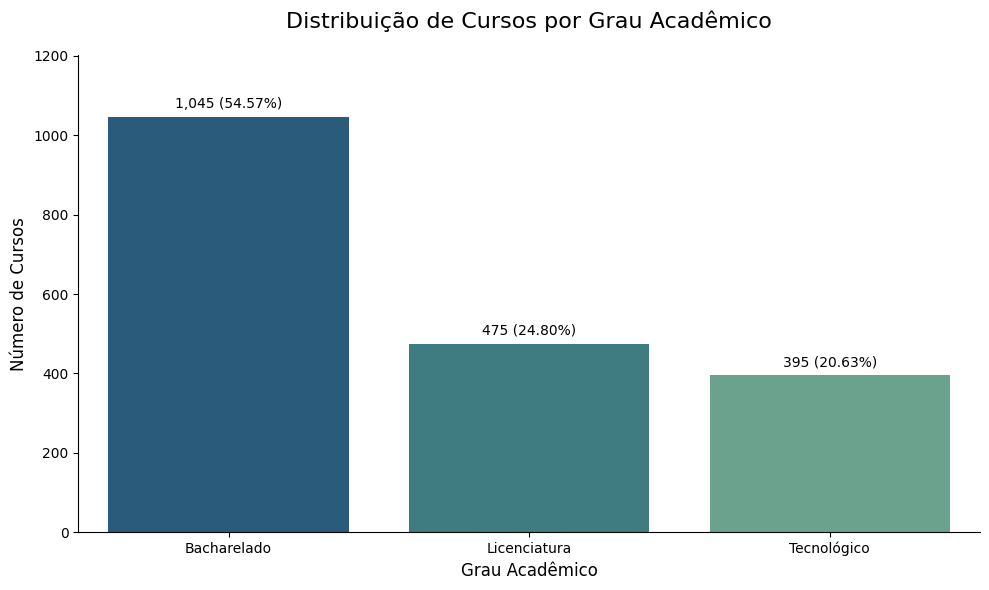

In [49]:
tabela_freq_grau = tabela_freq.sort_values(by='Frequência Absoluta', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=tabela_freq_grau.index,
    y=tabela_freq_grau['Frequência Absoluta'],
    palette='crest_r'
)

# Adiciona rótulos com valores + percentuais
for index, value in enumerate(tabela_freq_grau['Frequência Absoluta']):
    percentual = tabela_freq_grau['Frequência Relativa (%)'][index]
    texto = f'{value:,.0f} ({percentual:.2f}%)'
    plt.text(index, value + max(tabela_freq_grau['Frequência Absoluta']) * 0.015, texto,
             ha='center', va='bottom', fontsize=10)

# Estética e ajustes
plt.title('Distribuição de Cursos por Grau Acadêmico', fontsize=16, pad=20)
plt.ylabel('Número de Cursos', fontsize=12)
plt.xlabel('Grau Acadêmico', fontsize=12)
plt.ylim(0, max(tabela_freq_grau['Frequência Absoluta']) * 1.15)
sns.despine()
plt.tight_layout()
plt.show()

In [11]:
frequencia_relativa = pd.crosstab(df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL'], df['Grau Acadêmico'], normalize='index') * 100
frequencia_relativa = frequencia_relativa.round(2)  # Arredonda para 2 casas decimais
print(frequencia_relativa)


Grau Acadêmico                                           1      2      3
Nome da Grande Área do Curso segundo a classifi...                      
Agricultura, silvicultura, pesca e veterinária       83.33    0.0  16.67
Artes e humanidades                                  45.00    0.0  55.00
Ciências naturais, matemática e estatística          94.44    0.0   5.56
Ciências sociais, comunicação e informação          100.00    0.0   0.00
Computação e Tecnologias da Informação e Comuni...   37.93    0.0  62.07
Educação                                              0.00  100.0   0.00
Engenharia, produção e construção                    86.05    0.0  13.95
Negócios, administração e direito                    59.15    0.0  40.85
Saúde e bem-estar                                    98.36    0.0   1.64
Serviços                                             25.00    0.0  75.00


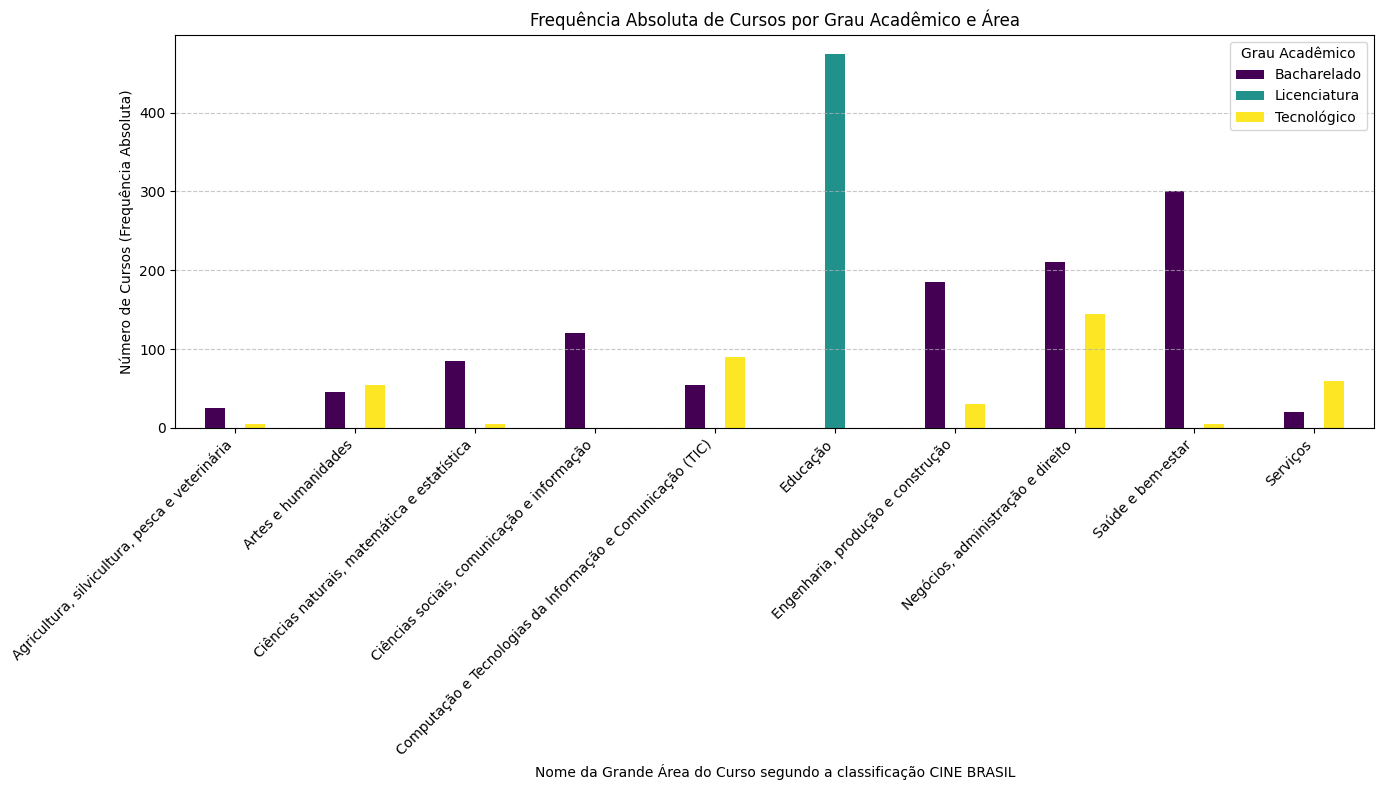

In [17]:
freq_grau_academico.plot(kind='bar', figsize=(14, 8), colormap='viridis', ax=plt.gca()) # ax=plt.gca() para plotar na figura atual

plt.title('Frequência Absoluta de Cursos por Grau Acadêmico e Área')
plt.xlabel('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')
plt.ylabel('Número de Cursos (Frequência Absoluta)')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X
plt.legend(title='Grau Acadêmico')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade leve
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

In [ ]:
.plot(kind='bar', figsize=(14, 8), colormap='viridis', ax=plt.gca()) # ax=plt.gca() para plotar na figura atual

plt.title('Frequência Absoluta de Cursos por Grau Acadêmico e Área')
plt.xlabel('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')
plt.ylabel('Número de Cursos (Frequência Absoluta)')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X
plt.legend(title='Grau Acadêmico')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade leve
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

### Grande Área

In [152]:
df.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')['Nome da Grande Área do Curso segundo a classificação CINE BRASIL'].count()

Nome da Grande Área do Curso segundo a classificação CINE BRASIL
Agricultura, silvicultura, pesca e veterinária                 30
Artes e humanidades                                           100
Ciências naturais, matemática e estatística                    90
Ciências sociais, comunicação e informação                    120
Computação e Tecnologias da Informação e Comunicação (TIC)    145
Educação                                                      475
Engenharia, produção e construção                             215
Negócios, administração e direito                             355
Saúde e bem-estar                                             305
Serviços                                                       80
Name: Nome da Grande Área do Curso segundo a classificação CINE BRASIL, dtype: int64

C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\740201270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


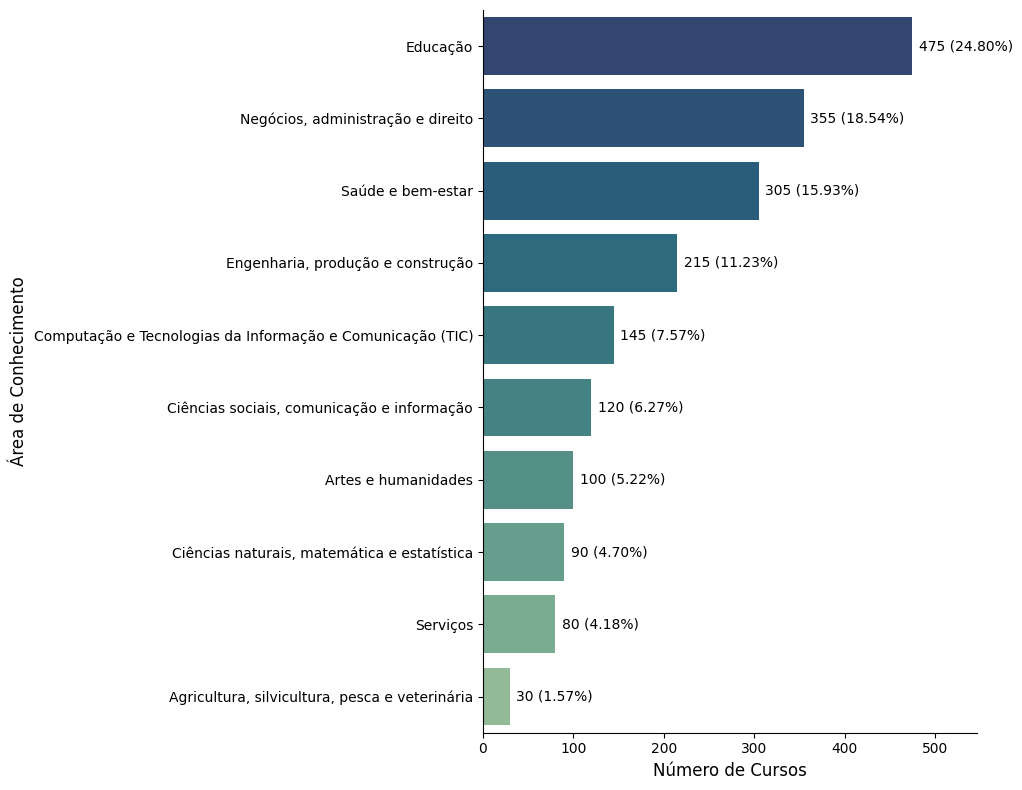

In [63]:

plt.figure(figsize=(10, 8)) # Aumente a altura para acomodar os rótulos no eixo Y
barplot = sns.barplot(
    x=tabela_freq_GrandeArea['Frequência Absoluta'], # Frequência no eixo X
    y=tabela_freq_GrandeArea.index,                   # Área no eixo Y
    palette='crest_r',
    orient='h'                                        # Especifica que o gráfico é horizontal
)

# Adiciona rótulos com valores + percentuais
# Agora iteramos sobre os valores do eixo Y (índice)
for index, value in enumerate(tabela_freq_GrandeArea['Frequência Absoluta']):
    percentual = tabela_freq_GrandeArea['Frequência Relativa (%)'].iloc[index] # Use iloc para acessar pelo índice numérico
    texto = f'{value:,.0f} ({percentual:.2f}%)'
    # Ajuste as coordenadas x e y para os rótulos no gráfico horizontal
    # x = valor da barra + um pequeno offset
    # y = posição da barra (index)
    plt.text(value + max(tabela_freq_GrandeArea['Frequência Absoluta']) * 0.015, # Adiciona offset ao valor da barra
             index, # Posição vertical (índice da barra)
             texto,
             ha='left', va='center', fontsize=10) # Alinhamento para rótulos horizontais

# Estética e ajustes
plt.xlabel('Número de Cursos', fontsize=12) # Eixo X agora é Número de Cursos
plt.ylabel('Área de Conhecimento', fontsize=12) # Eixo Y agora é Área de Conhecimento
plt.xlim(0, max(tabela_freq_GrandeArea['Frequência Absoluta']) * 1.15) # Ajusta o limite do eixo X
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\2947028562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Jeane\AppData\Local\Temp\ipykernel_10300\2947028562.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentual = tabela_freq_GrandeArea['Frequência Relativa (%)'][index]


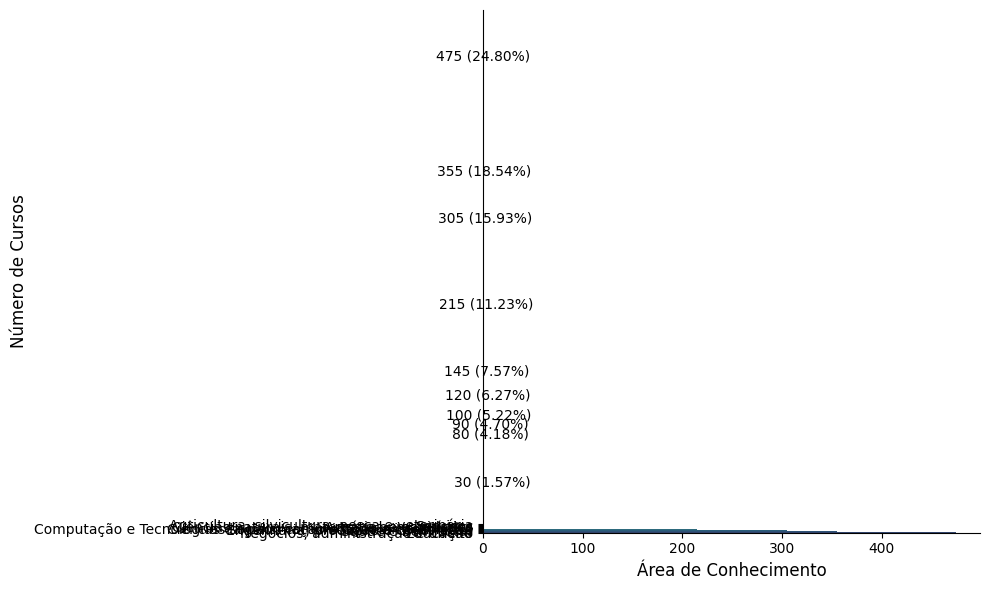

In [61]:
tabela_freq_GrandeArea = tabela_freq_GrandeArea.sort_values(by='Frequência Absoluta', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=tabela_freq_GrandeArea.index,
    y=tabela_freq_GrandeArea['Frequência Absoluta'],
    palette='crest_r'
)

# Adiciona rótulos com valores + percentuais
for index, value in enumerate(tabela_freq_GrandeArea['Frequência Absoluta']):
    percentual = tabela_freq_GrandeArea['Frequência Relativa (%)'][index]
    texto = f'{value:,.0f} ({percentual:.2f}%)'
    plt.text(index, value + max(tabela_freq_grau['Frequência Absoluta']) * 0.015, texto,
             ha='center', va='bottom', fontsize=10)

# Estética e ajustes
plt.ylabel('Número de Cursos', fontsize=12)
plt.xlabel('Área de Conhecimento', fontsize=12)
plt.ylim(0, max(tabela_freq_GrandeArea['Frequência Absoluta']) * 1.15)
sns.despine()
plt.tight_layout()
plt.show()

### Desistência

#### Por Modalidade de Ensino

In [105]:
tabela_desistencia_por_modalidade = df.pivot_table(
    index='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
    columns='Modalidade de Ensino',
    values='Quantidade de Desistência no Curso no ano de referência',
    aggfunc='sum'
).fillna(0).rename(columns={
    '1': 'Desistências no Presencial',
    '2': 'Desistências no Remoto'
})

tabela_desistencia_por_modalidade

Modalidade de Ensino,Desistências no Presencial,Desistências no Remoto
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,
"Agricultura, silvicultura, pesca e veterinária",165,0
Artes e humanidades,397,80
"Ciências naturais, matemática e estatística",1209,17
"Ciências sociais, comunicação e informação",1036,5
Computação e Tecnologias da Informação e Comunicação (TIC),680,233
Educação,2381,885
"Engenharia, produção e construção",1029,434
"Negócios, administração e direito",3258,2309
Saúde e bem-estar,2170,541


In [106]:
tabela_desistencia_por_modalidade.describe()

Modalidade de Ensino,Desistências no Presencial,Desistências no Remoto
count,10.0,10.0
mean,1293.5,476.3
std,992.995161,703.578954
min,165.0,0.0
25%,627.5,32.75
50%,1032.5,246.0
75%,1929.75,514.25
max,3258.0,2309.0


In [107]:
freq_abs_desistencia_presencial = tabela_desistencia_por_modalidade['Desistências no Presencial'].sum();
freq_abs_desistencia_presencial

12935

In [108]:
freq_abs_desistencia_remoto = tabela_desistencia_por_modalidade['Desistências no Remoto'].sum();
freq_abs_desistencia_remoto

4763

#### Por Grau Acadêmico

In [109]:
tabela_desistencia_por_grau_academico = df.pivot_table(
    index='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
    columns='Grau Acadêmico',
    values='Quantidade de Desistência no Curso no ano de referência',
    aggfunc='sum'
).fillna(0).rename(columns={
    '1': 'Desistências em Bacharel',
    '2': 'Desistências em Licenciatura',
    '3': 'Desistências em Tecnólogo'
})


tabela_desistencia_por_grau_academico 

Grau Acadêmico,Desistências em Bacharel,Desistências em Licenciatura,Desistências em Tecnólogo
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,,
"Agricultura, silvicultura, pesca e veterinária",136,0,29
Artes e humanidades,93,0,384
"Ciências naturais, matemática e estatística",1199,0,27
"Ciências sociais, comunicação e informação",1041,0,0
Computação e Tecnologias da Informação e Comunicação (TIC),367,0,546
Educação,0,3266,0
"Engenharia, produção e construção",1265,0,198
"Negócios, administração e direito",3900,0,1667
Saúde e bem-estar,2675,0,36


In [110]:
tabela_desistencia_por_grau_academico.describe()

Grau Acadêmico,Desistências em Bacharel,Desistências em Licenciatura,Desistências em Tecnólogo
count,10.0,10.0,10.0
mean,1080.1,326.6,363.1
std,1290.926924,1032.799884,527.220268
min,0.0,0.0,0.0
25%,127.75,0.0,27.5
50%,704.0,0.0,117.0
75%,1248.5,0.0,505.5
max,3900.0,3266.0,1667.0


In [111]:
freq_abs_desistencia_bacharel = tabela_desistencia_por_grau_academico['Desistências em Bacharel'].sum();
freq_abs_desistencia_bacharel

10801

In [112]:
freq_abs_desistencia_licenciatura = tabela_desistencia_por_grau_academico['Desistências em Licenciatura'].sum();
freq_abs_desistencia_licenciatura

3266

In [113]:
freq_abs_desistencia_tecnologo = tabela_desistencia_por_grau_academico['Desistências em Tecnólogo'].sum();
freq_abs_desistencia_tecnologo

3631

#### Concluintes em 2023

In [114]:
tabela_concluintes_ano_2023 = df[df['Ano de Referência'] == '2023'].groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')['Quantidade de Concluintes no Curso no ano de referência'].sum()
tabela_concluintes_ano_2023 

Nome da Grande Área do Curso segundo a classificação CINE BRASIL
Agricultura, silvicultura, pesca e veterinária                  36
Artes e humanidades                                             26
Ciências naturais, matemática e estatística                    117
Ciências sociais, comunicação e informação                     490
Computação e Tecnologias da Informação e Comunicação (TIC)      94
Educação                                                       662
Engenharia, produção e construção                              218
Negócios, administração e direito                              922
Saúde e bem-estar                                             1053
Serviços                                                        53
Name: Quantidade de Concluintes no Curso no ano de referência, dtype: Int64

#### Tabela de Frequências

In [115]:
freq_abs_desistencia = df.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')['Quantidade de Desistência no Curso no ano de referência'].sum()
freq_abs_desistencia

Nome da Grande Área do Curso segundo a classificação CINE BRASIL
Agricultura, silvicultura, pesca e veterinária                 165
Artes e humanidades                                            477
Ciências naturais, matemática e estatística                   1226
Ciências sociais, comunicação e informação                    1041
Computação e Tecnologias da Informação e Comunicação (TIC)     913
Educação                                                      3266
Engenharia, produção e construção                             1463
Negócios, administração e direito                             5567
Saúde e bem-estar                                             2711
Serviços                                                       869
Name: Quantidade de Desistência no Curso no ano de referência, dtype: Int64

In [116]:
freq_rel_desistencia = freq_abs_desistencia/freq_abs_desistencia.sum()
freq_rel_desistencia

Nome da Grande Área do Curso segundo a classificação CINE BRASIL
Agricultura, silvicultura, pesca e veterinária                0.009323
Artes e humanidades                                           0.026952
Ciências naturais, matemática e estatística                   0.069273
Ciências sociais, comunicação e informação                     0.05882
Computação e Tecnologias da Informação e Comunicação (TIC)    0.051588
Educação                                                      0.184541
Engenharia, produção e construção                             0.082665
Negócios, administração e direito                             0.314555
Saúde e bem-estar                                             0.153181
Serviços                                                      0.049102
Name: Quantidade de Desistência no Curso no ano de referência, dtype: Float64

In [117]:
tabela_freq_desistencia = pd.DataFrame({
    'Nº de Desistentes (Absoluta)': freq_abs_desistencia,
    '% do Total de Desistentes (Relativa)': (freq_rel_desistencia * 100).round(2)
})

tabela_freq_desistencia

,Nº de Desistentes (Absoluta),% do Total de Desistentes (Relativa)
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,
"Agricultura, silvicultura, pesca e veterinária",165,0.93
Artes e humanidades,477,2.7
"Ciências naturais, matemática e estatística",1226,6.93
"Ciências sociais, comunicação e informação",1041,5.88
Computação e Tecnologias da Informação e Comunicação (TIC),913,5.16
Educação,3266,18.45
"Engenharia, produção e construção",1463,8.27
"Negócios, administração e direito",5567,31.46
Saúde e bem-estar,2711,15.32


/tmp/ipykernel_19835/2878336690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


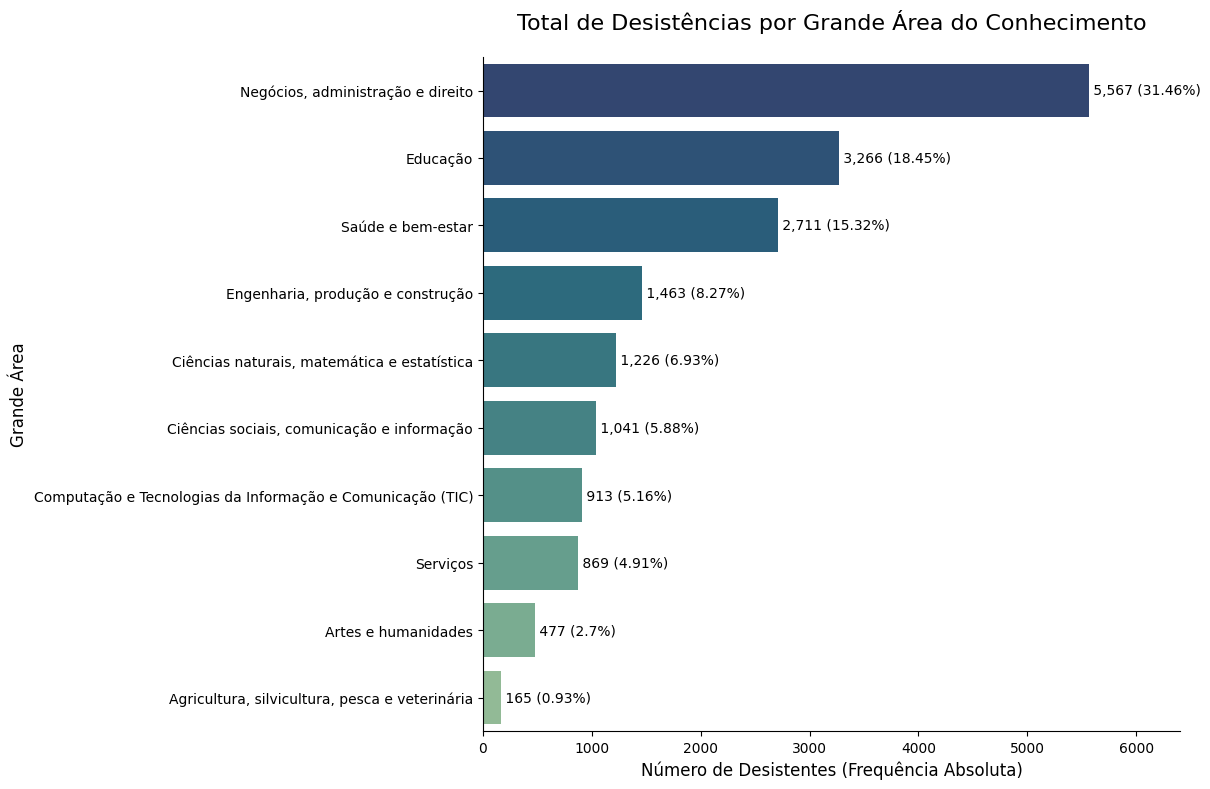

In [118]:
tabela_freq_desistencia_ordenada = tabela_freq_desistencia.sort_values(by='Nº de Desistentes (Absoluta)', ascending=False)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x=tabela_freq_desistencia_ordenada['Nº de Desistentes (Absoluta)'],
    y=tabela_freq_desistencia_ordenada.index,
    palette='crest_r'
)

for index, value in enumerate(tabela_freq_desistencia_ordenada['Nº de Desistentes (Absoluta)']):
    percentual = tabela_freq_desistencia_ordenada['% do Total de Desistentes (Relativa)'][index]

    texto_anotacao = f' {value:,.0f} ({percentual}%)' # Ex: 5,567 (31.46%)
    
    plt.text(value, index, texto_anotacao, va='center', fontsize=10)


plt.title('Total de Desistências por Grande Área do Conhecimento', fontsize=16, pad=20)
plt.xlabel('Número de Desistentes (Frequência Absoluta)', fontsize=12)
plt.ylabel('Grande Área', fontsize=12)
plt.xlim(0, max(tabela_freq_desistencia_ordenada['Nº de Desistentes (Absoluta)']) * 1.15)
sns.despine()

plt.tight_layout()
plt.show()

In [89]:
desistencia_describe = df['Quantidade de Desistência no Curso no ano de referência'].describe()
tabela_desistencia_describe = desistencia_describe.to_frame()
display(tabela_desistencia_describe.style.format("{:.2f}"))

,Quantidade de Desistência no Curso no ano de referência
count,1915.00
mean,9.24
std,20.97
min,0.00
25%,1.00
50%,4.00
75%,10.00
max,369.00


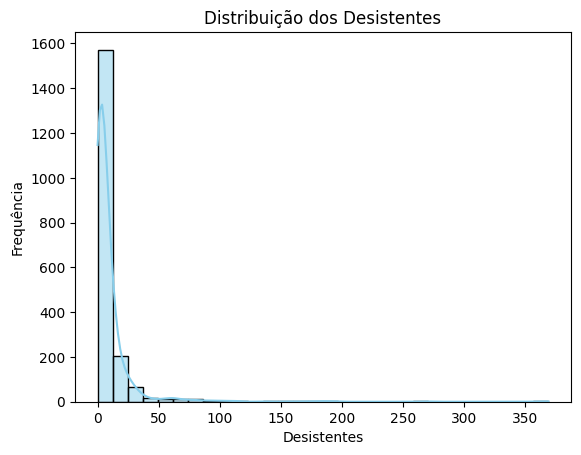

In [133]:
sns.histplot(df['Quantidade de Desistência no Curso no ano de referência'].dropna(), kde=True, bins=30, color='skyblue'),
plt.title('Distribuição dos Desistentes')
plt.xlabel('Desistentes')
plt.ylabel('Frequência')
plt.show()

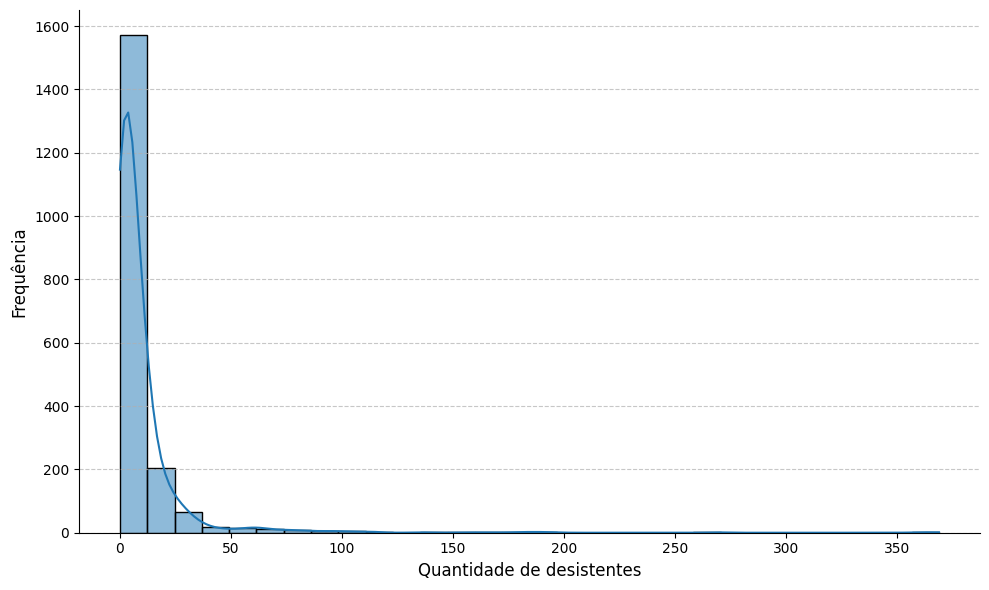

In [90]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.histplot(df['Quantidade de Desistência no Curso no ano de referência'], kde=True, bins=30) # kde=True adiciona a estimativa de densidade do kernel

plt.xlabel('Quantidade de desistentes', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
sns.despine() # Remove as "espinhas" (bordas) do lado direito e superior
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

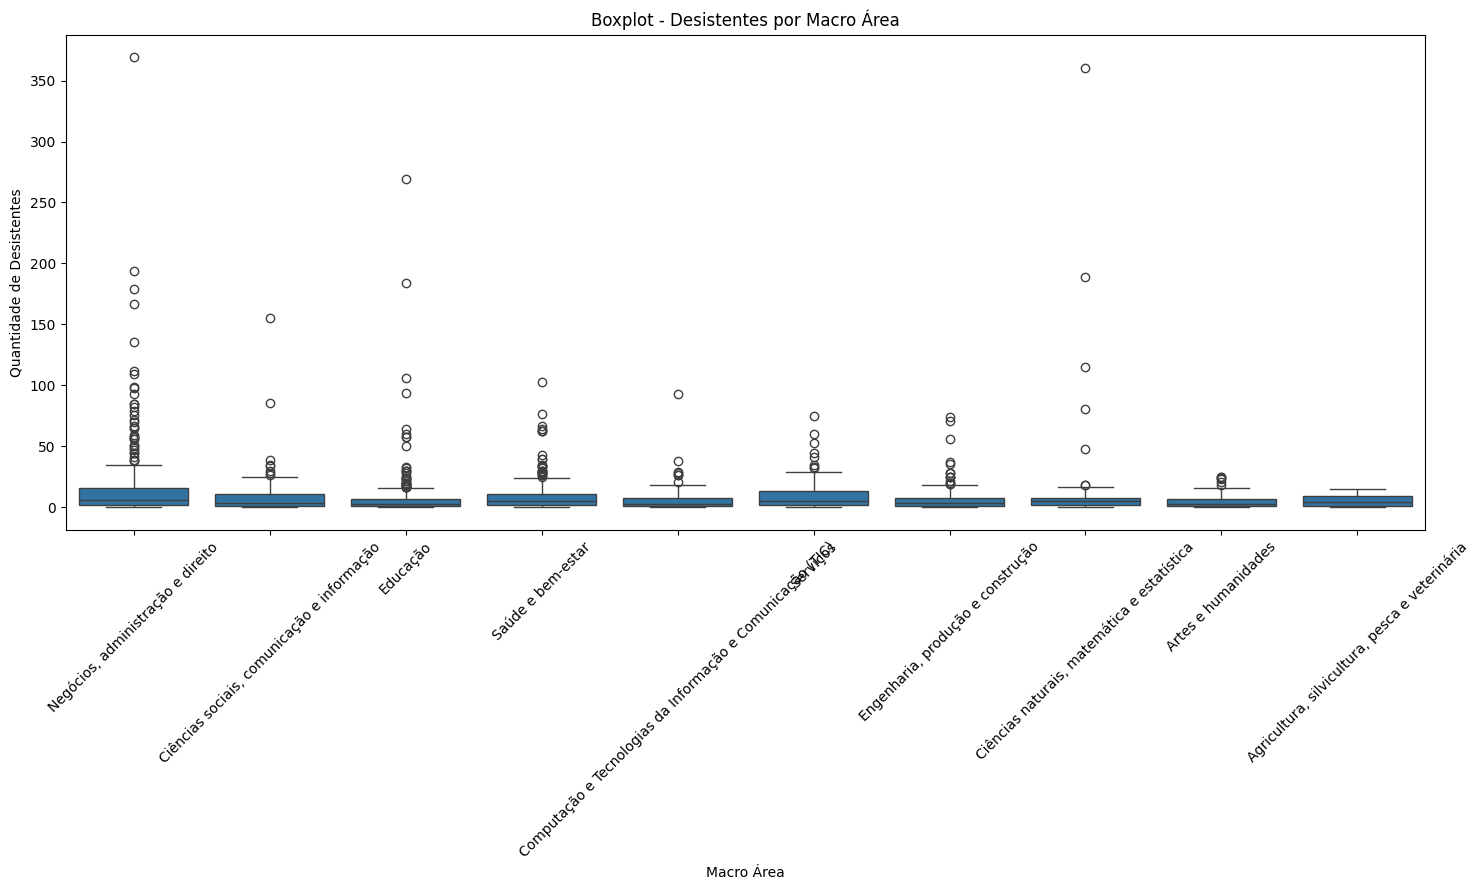

In [154]:
plt.figure(figsize=(15, 9))
sns.boxplot(
    x='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
    y='Quantidade de Desistência no Curso no ano de referência',
    data=df
)
plt.title('Boxplot - Desistentes por Macro Área')
plt.xlabel('Macro Área')
plt.ylabel('Quantidade de Desistentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [165]:
stat, p = shapiro(desistencia_describe)
print(f'Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p:.4f}')

if p > 0.05:
    print("Distribuição normal")
else:
    print("Distribuição não normal")

Shapiro-Wilk: Estatística=0.5381, p-valor=0.0000
Distribuição não normal


### Concluintes

In [84]:
concluintes_describe = df['Quantidade de Concluintes no Curso no ano de referência'].describe()
tabela_concluintes_describe = concluintes_describe.to_frame()
display(tabela_concluintes_describe.style.format("{:.2f}"))

,Quantidade de Concluintes no Curso no ano de referência
count,1915.00
mean,3.67
std,10.65
min,0.00
25%,0.00
50%,0.00
75%,2.00
max,148.00


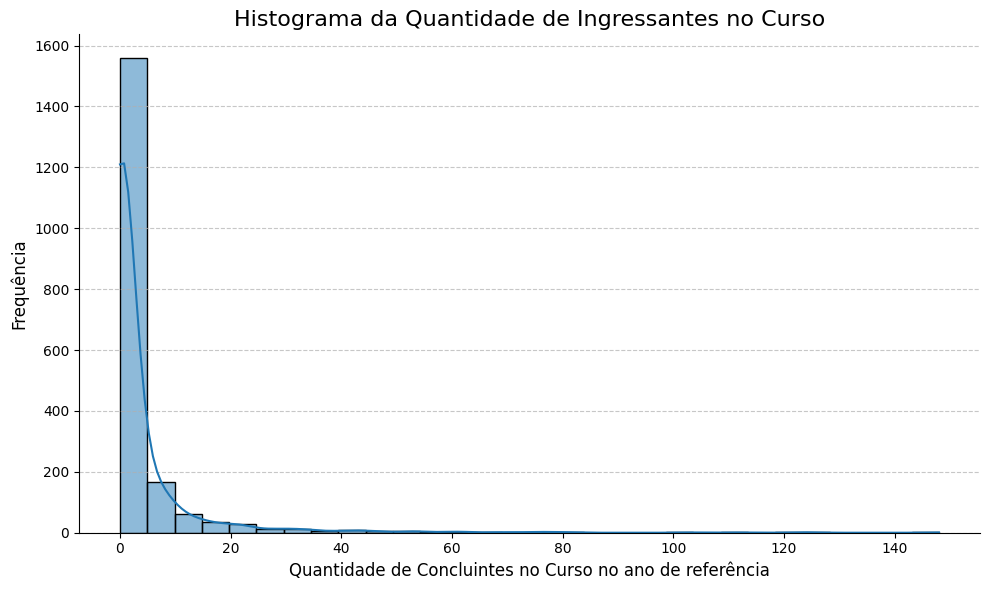

In [86]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.histplot(df['Quantidade de Concluintes no Curso no ano de referência'], kde=True, bins=30) # kde=True adiciona a estimativa de densidade do kernel
plt.title('Histograma da Quantidade de Ingressantes no Curso', fontsize=16)
plt.xlabel('Quantidade de Concluintes no Curso no ano de referência', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
sns.despine() # Remove as "espinhas" (bordas) do lado direito e superior
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [24]:
df.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')['Quantidade de Concluintes no Curso no ano de referência'].describe()

,count,mean,std,min,25%,50%,75%,max
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,,,,,,,
"Agricultura, silvicultura, pesca e veterinária",30.0,1.266667,3.912256,0.0,0.0,0.0,0.0,20.0
Artes e humanidades,100.0,1.85,5.600099,0.0,0.0,0.0,1.0,48.0
"Ciências naturais, matemática e estatística",90.0,2.8,8.712899,0.0,0.0,0.0,2.0,61.0
"Ciências sociais, comunicação e informação",120.0,4.416667,14.961903,0.0,0.0,0.0,1.0,103.0
Computação e Tecnologias da Informação e Comunicação (TIC),145.0,1.648276,5.124195,0.0,0.0,0.0,1.0,52.0
Educação,475.0,3.006316,9.241598,0.0,0.0,0.0,2.0,148.0
"Engenharia, produção e construção",215.0,2.195349,4.288539,0.0,0.0,0.0,3.0,25.0
"Negócios, administração e direito",355.0,5.774648,14.354665,0.0,0.0,0.0,4.5,125.0
Saúde e bem-estar,305.0,5.15082,12.294771,0.0,0.0,0.0,3.0,111.0


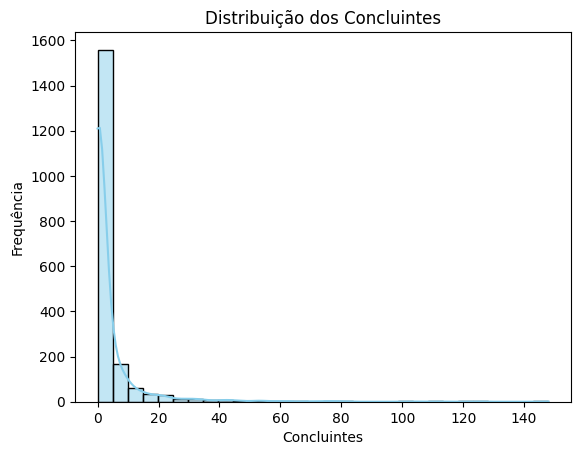

In [156]:
sns.histplot(df['Quantidade de Concluintes no Curso no ano de referência'].dropna(), kde=True, bins=30, color='skyblue'),
plt.title('Distribuição dos Concluintes')
plt.xlabel('Concluintes')
plt.ylabel('Frequência')
plt.show()

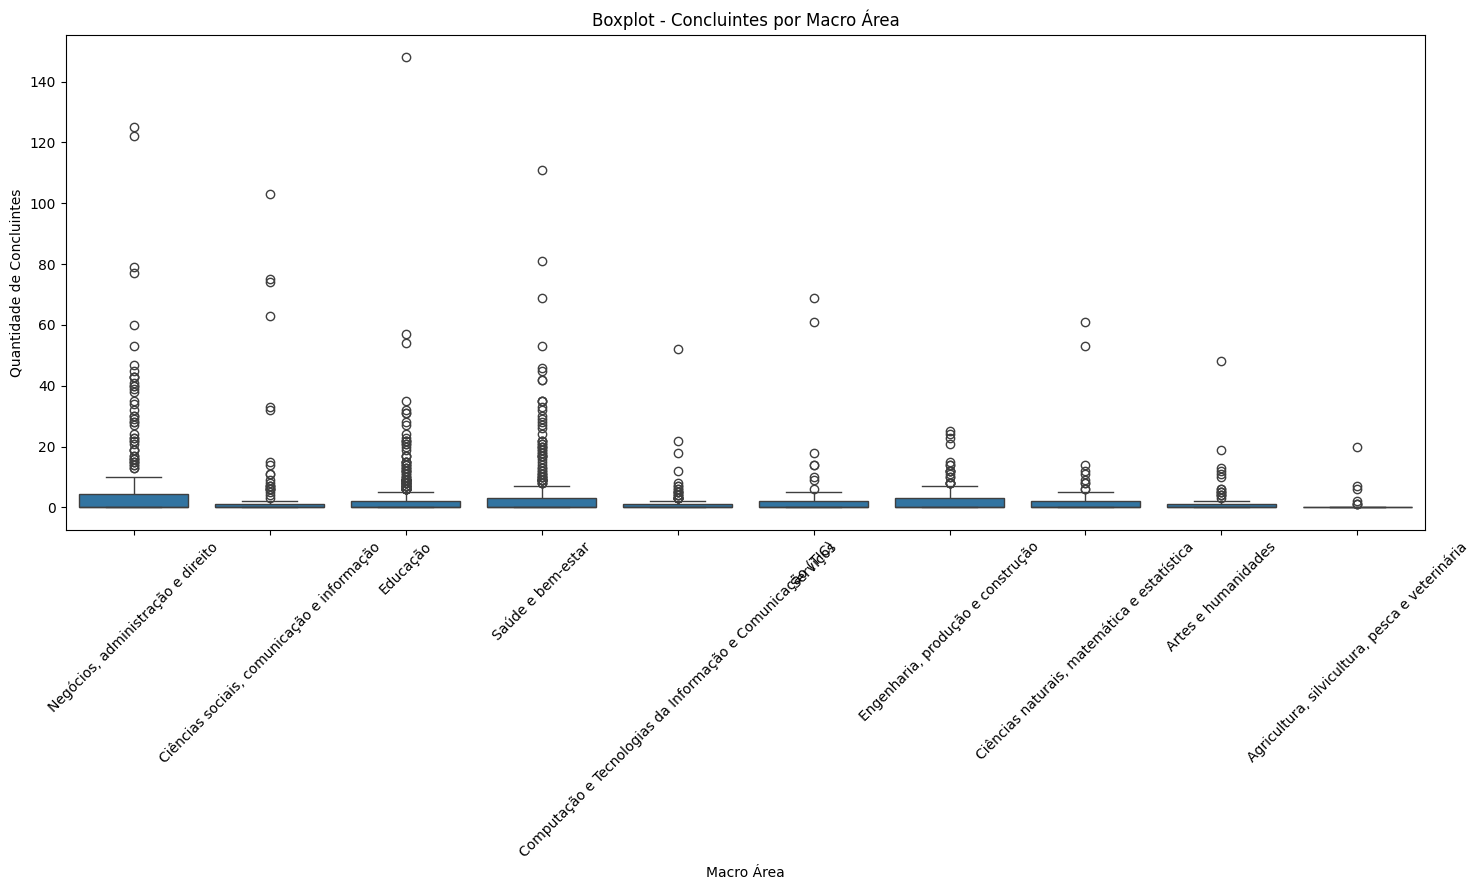

In [157]:
plt.figure(figsize=(15, 9))
sns.boxplot(
    x='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
    y='Quantidade de Concluintes no Curso no ano de referência',
    data=df
)
plt.title('Boxplot - Concluintes por Macro Área')
plt.xlabel('Macro Área')
plt.ylabel('Quantidade de Concluintes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [164]:
stat, p = shapiro(concluintes_describe)
print(f'Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p:.4f}')

if p > 0.05:
    print("Distribuição normal")
else:
    print("Distribuição não normal")

Shapiro-Wilk: Estatística=0.4939, p-valor=0.0000
Distribuição não normal


### Ingressantes

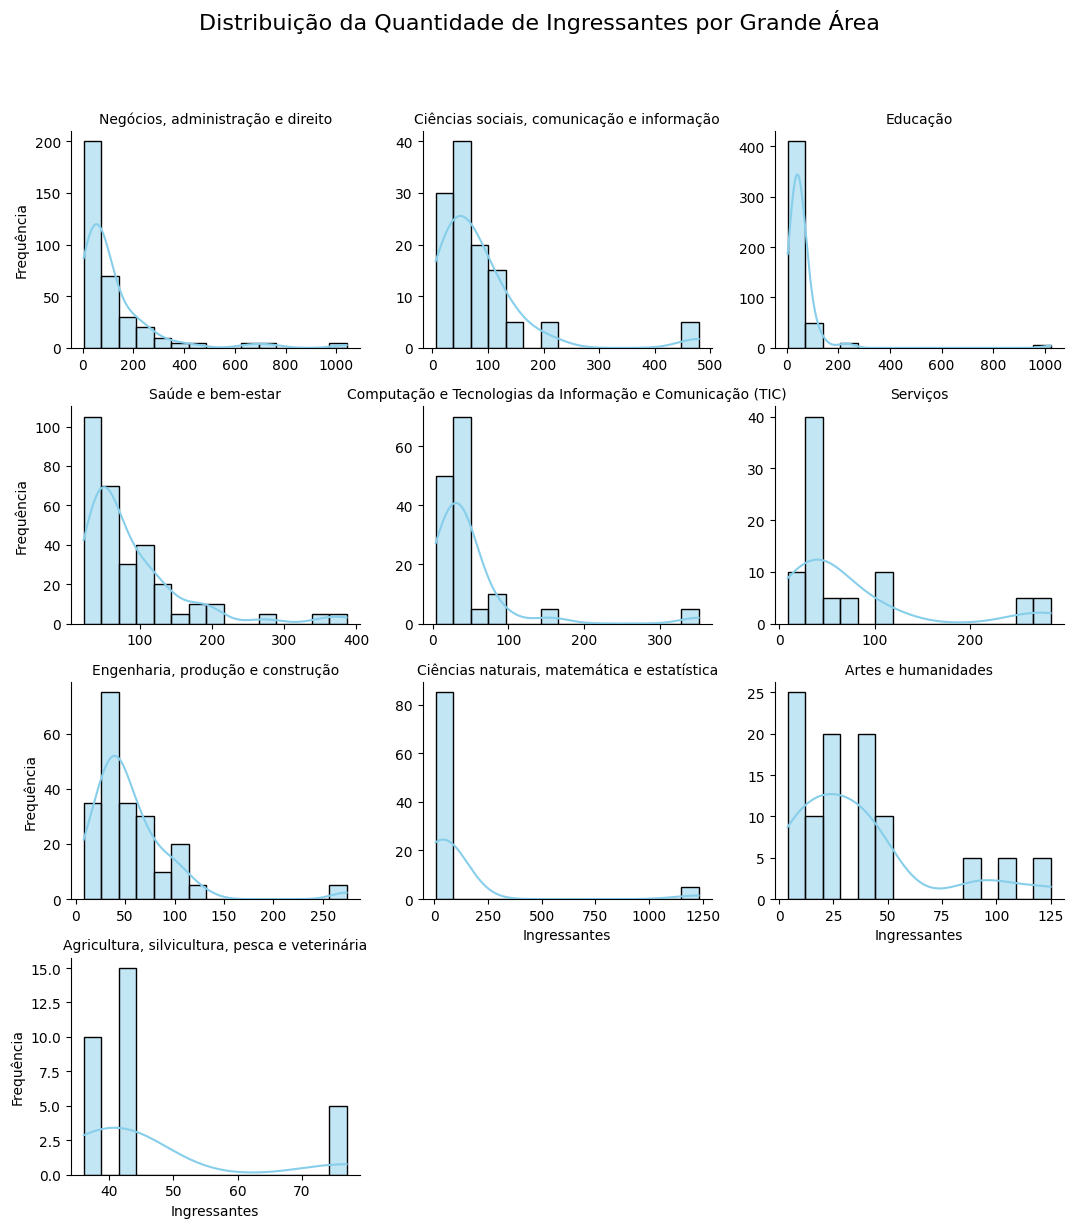

In [32]:
g = sns.FacetGrid(df, col='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
                  col_wrap=3, # Número de colunas de subplots
                  height=3, aspect=1.2, # Tamanho de cada subplot
                  sharex=False, sharey=False) # Permite que os eixos X e Y sejam independentes

g.map_dataframe(sns.histplot, x='Quantidade de Ingressantes no Curso', kde=True, bins=15, color='skyblue')

g.set_axis_labels('Ingressantes', 'Frequência')
g.set_titles(col_template='{col_name}') # Define o título de cada subplot
g.fig.suptitle('Distribuição da Quantidade de Ingressantes por Grande Área', y=1.02, fontsize=16) # Título geral da figura
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout para o título principal
plt.show()

C:\Users\Jeane\AppData\Local\Temp\ipykernel_6084\4265911342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


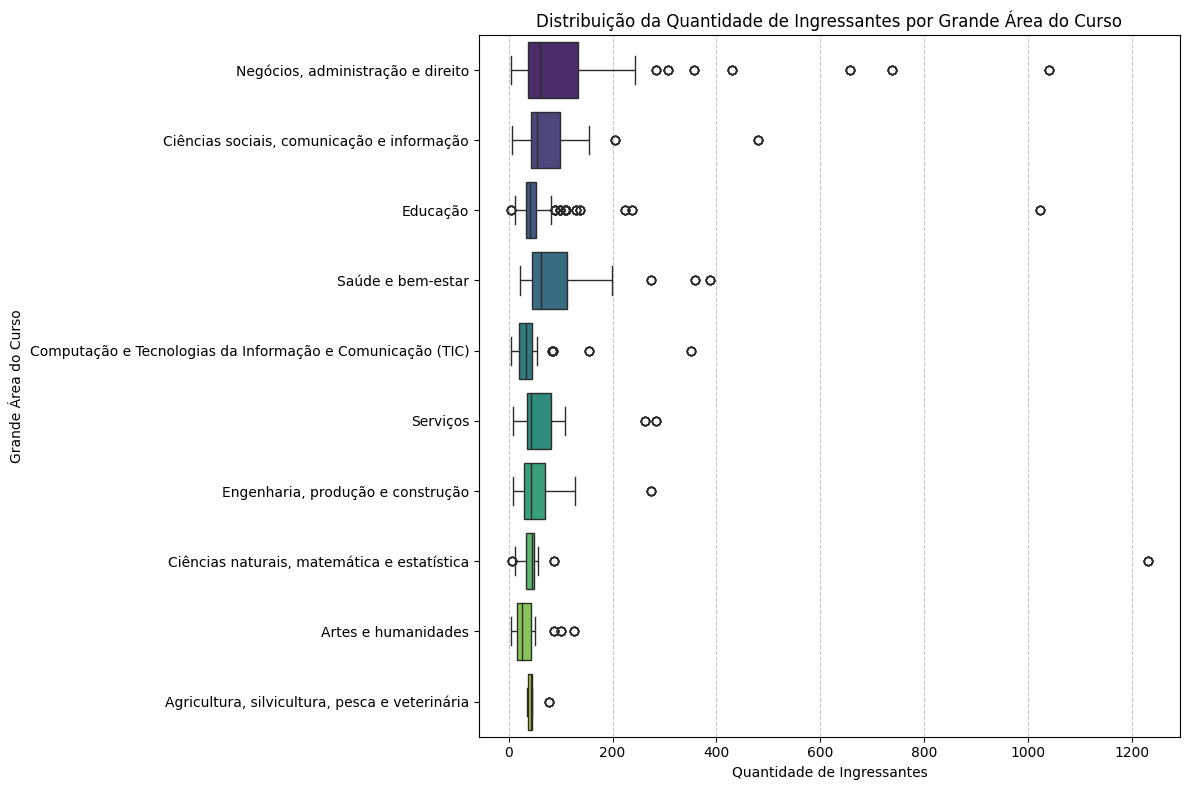

In [33]:
plt.figure(figsize=(12, 8)) # Ajuste o tamanho para melhor visualização

sns.boxplot(data=df,
            x='Quantidade de Ingressantes no Curso',
            y='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
            palette='viridis', # Escolha uma paleta de cores
            orient='h' # 'h' para horizontal, barras no eixo X, categorias no eixo Y
           )

plt.title('Distribuição da Quantidade de Ingressantes por Grande Área do Curso')
plt.xlabel('Quantidade de Ingressantes')
plt.ylabel('Grande Área do Curso')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade no eixo X
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

In [26]:
ingressantes_agrupado = df.groupby('Nome da Grande Área do Curso segundo a classificação CINE BRASIL')['Quantidade de Ingressantes no Curso'].describe()
ingressantes_agrupado

,count,mean,std,min,25%,50%,75%,max
Nome da Grande Área do Curso segundo a classificação CINE BRASIL,,,,,,,,
"Agricultura, silvicultura, pesca e veterinária",30.0,46.666667,14.150261,36.0,37.0,43.0,44.0,77.0
Artes e humanidades,100.0,36.9,32.262966,4.0,16.5,26.5,42.0,125.0
"Ciências naturais, matemática e estatística",90.0,106.722222,274.761348,6.0,33.0,44.5,49.0,1231.0
"Ciências sociais, comunicação e informação",120.0,85.916667,95.228569,6.0,42.5,54.0,98.75,479.0
Computação e Tecnologias da Informação e Comunicação (TIC),145.0,48.448276,64.631211,4.0,20.0,33.0,44.0,351.0
Educação,475.0,60.852632,105.25877,4.0,34.0,41.0,53.0,1022.0
"Engenharia, produção e construção",215.0,55.674419,43.99486,8.0,30.0,43.0,70.0,274.0
"Negócios, administração e direito",355.0,124.943662,171.579476,4.0,38.0,61.0,134.0,1040.0
Saúde e bem-estar,305.0,90.016393,73.046149,22.0,44.0,63.0,112.0,387.0


C:\Users\Jeane\AppData\Local\Temp\ipykernel_6084\584323472.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Grande Área do Curso', bbox_to_anchor=(1.05, 1), loc='upper left') # Coloca a legenda fora


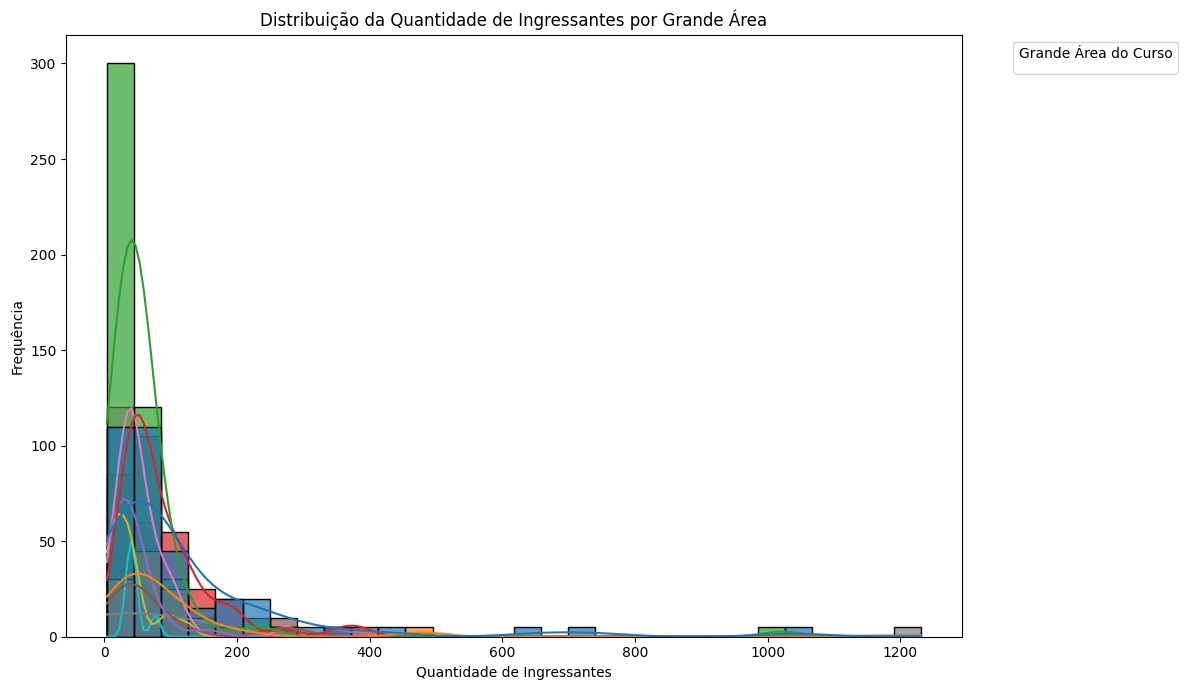

In [29]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df,
             x='Quantidade de Ingressantes no Curso',
             hue='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
             kde=True, # Adiciona a estimativa de densidade de kernel
             bins=30,  # Número de bins
             palette='tab10', # Paleta de cores para as diferentes áreas
             alpha=0.7) # Transparência para ver sobreposições

plt.title('Distribuição da Quantidade de Ingressantes por Grande Área')
plt.xlabel('Quantidade de Ingressantes')
plt.ylabel('Frequência')
plt.legend(title='Grande Área do Curso', bbox_to_anchor=(1.05, 1), loc='upper left') # Coloca a legenda fora
plt.tight_layout()
plt.show()

In [131]:
ingressantes_ano_2019 = df[df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL']['Quantidade de Ingressantes no Curso']
ingressantes_ano_2019.describe()

count         383.0
mean      78.749347
std      121.496881
min             4.0
25%            34.0
50%            45.0
75%            80.5
max          1231.0
Name: Quantidade de Ingressantes no Curso, dtype: Float64

ValueError: `dataset` input should have multiple elements.

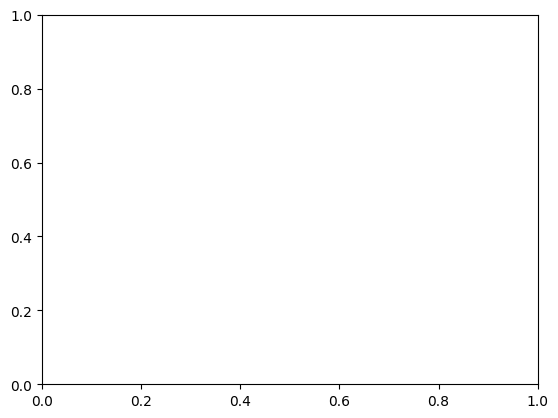

In [27]:
sns.histplot(df[ingressantes_agrupado ], kde=True, bins=30, color='skyblue'),
plt.title('Distribuição dos Ingressantes')
plt.xlabel('Ingressantes')
plt.ylabel('Frequência')
plt.show()

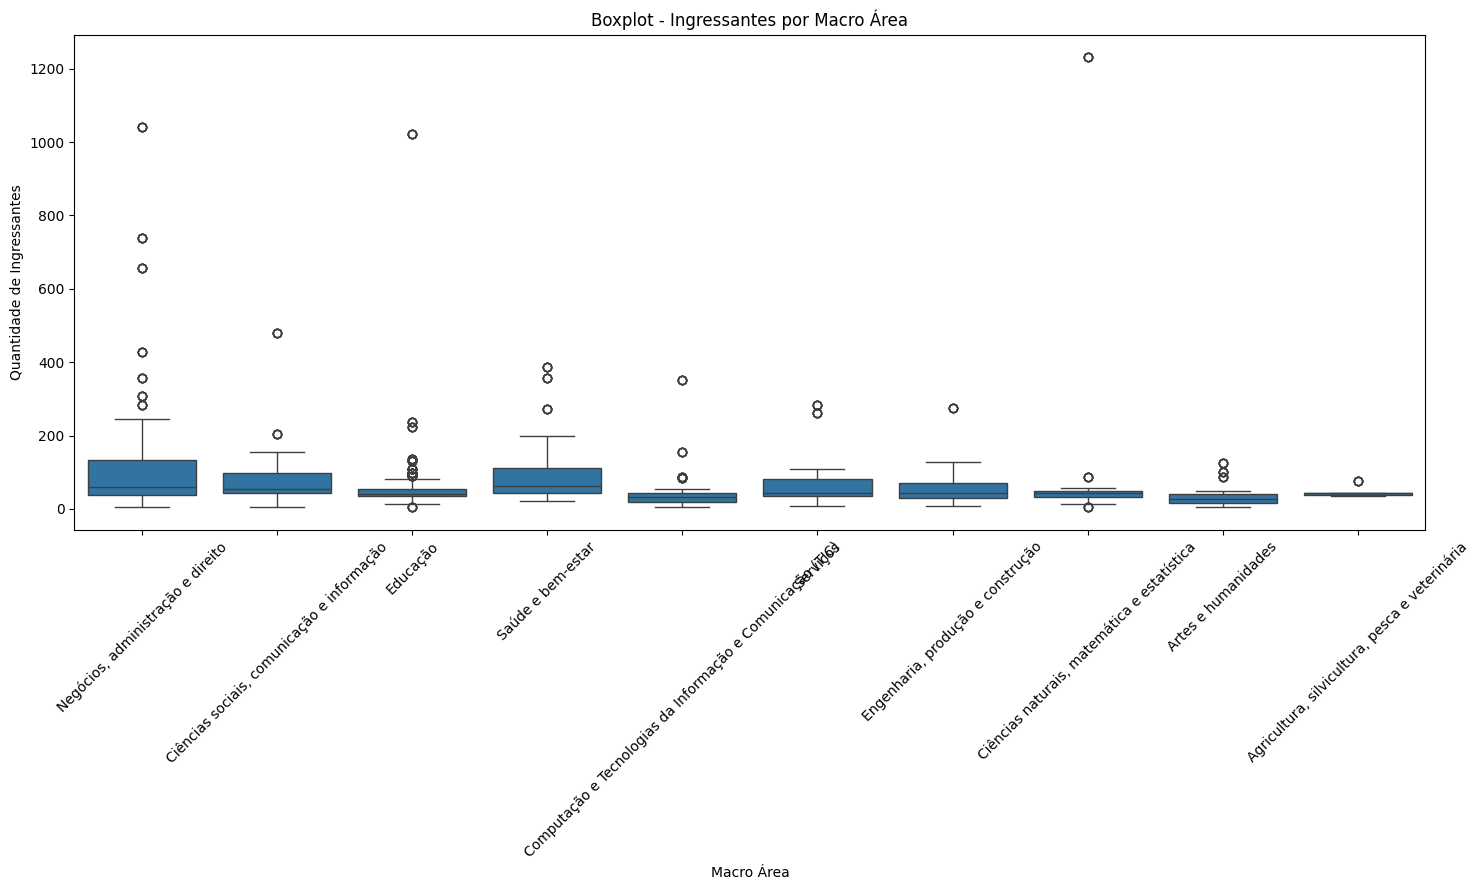

In [123]:
plt.figure(figsize=(15, 9))
sns.boxplot(
    x='Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
    y='Quantidade de Ingressantes no Curso',
    data=df
)
plt.title('Boxplot - Ingressantes por Macro Área')
plt.xlabel('Macro Área')
plt.ylabel('Quantidade de Ingressantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [163]:
stat, p = shapiro(ingressantes_ano_2019)
print(f'Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p:.4f}')

if p > 0.05:
    print("Distribuição normal")
else:
    print("Distribuição não normal")

Shapiro-Wilk: Estatística=0.4408, p-valor=0.0000
Distribuição não normal


In [78]:
ingressantes_describe = df['Quantidade de Ingressantes no Curso'].describe()
tabela_ingressantes_describe = ingressantes_describe.to_frame()
display(tabela_ingressantes_describe.style.format("{:.2f}"))

,Quantidade de Ingressantes no Curso
count,1915.00
mean,78.75
std,121.37
min,4.00
25%,34.00
50%,45.00
75%,81.00
max,1231.00


In [79]:
df.dropna(subset=['Quantidade de Ingressantes no Curso'], inplace=True)


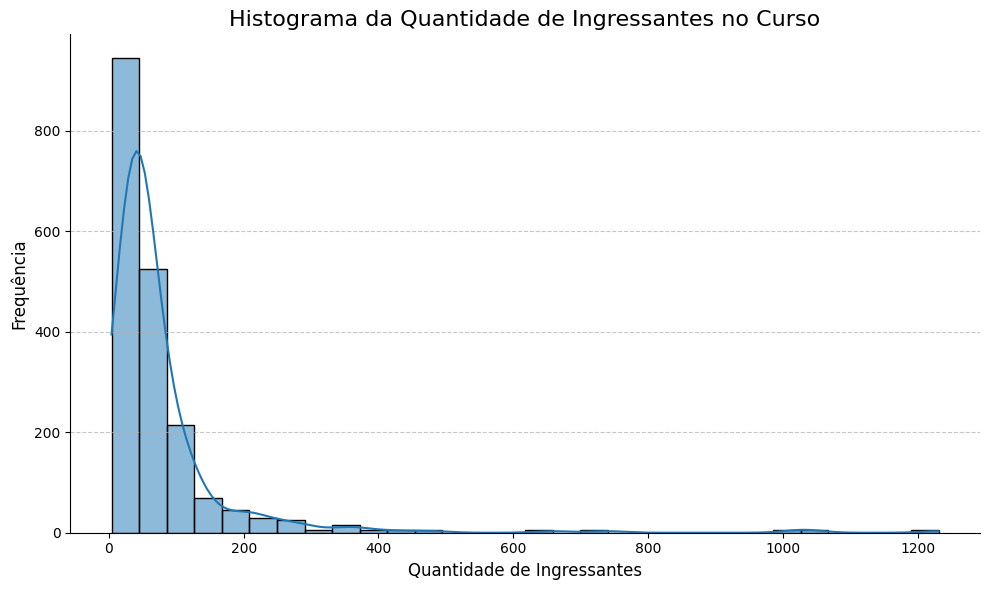

In [80]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.histplot(df['Quantidade de Ingressantes no Curso'], kde=True, bins=30) # kde=True adiciona a estimativa de densidade do kernel
plt.title('Histograma da Quantidade de Ingressantes no Curso', fontsize=16)
plt.xlabel('Quantidade de Ingressantes', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
sns.despine() # Remove as "espinhas" (bordas) do lado direito e superior
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

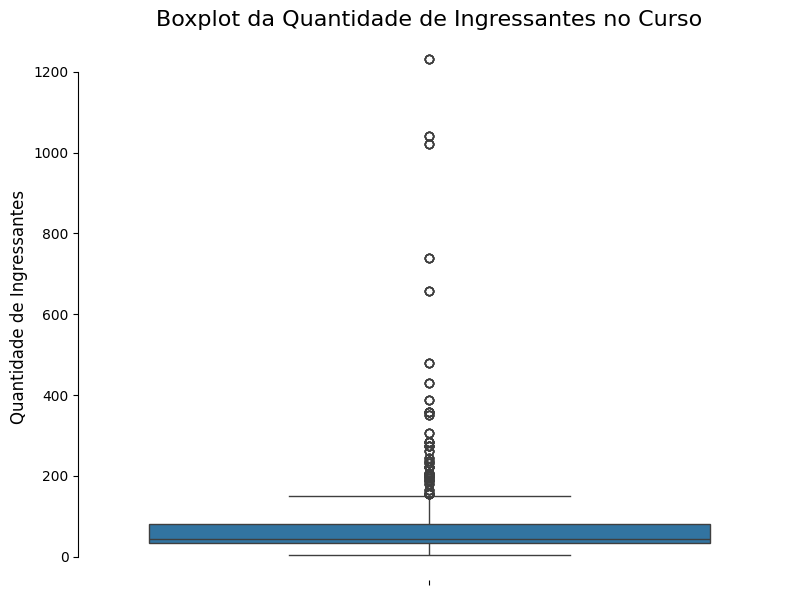

In [83]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.boxplot(y=df['Quantidade de Ingressantes no Curso']) # 'y=' indica que é um boxplot vertical
plt.title('Boxplot da Quantidade de Ingressantes no Curso', fontsize=16)
plt.ylabel('Quantidade de Ingressantes', fontsize=12)
sns.despine(trim=True) # Remove as "espinhas" e corta no limite dos dados
plt.tight_layout()
plt.show()

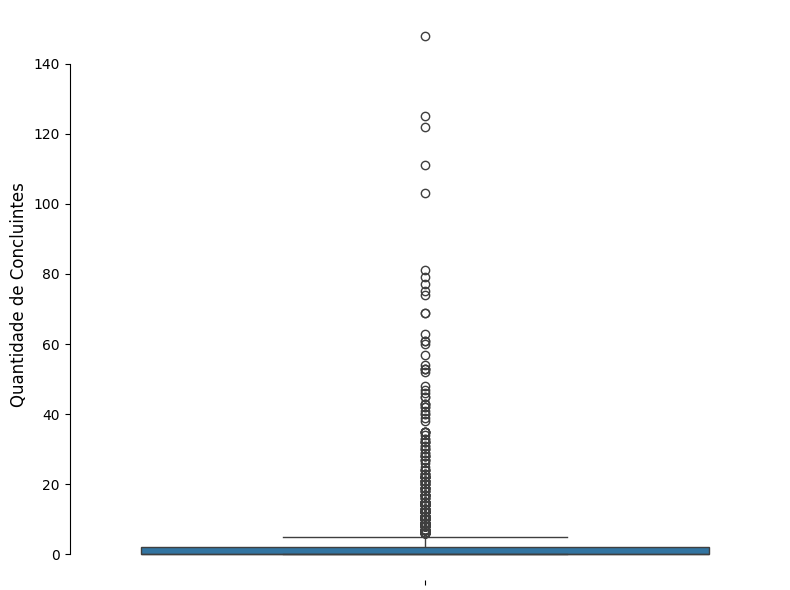

In [88]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.boxplot(y=df['Quantidade de Concluintes no Curso no ano de referência']) # 'y=' indica que é um boxplot vertical

plt.ylabel('Quantidade de Concluintes', fontsize=12)
sns.despine(trim=True) # Remove as "espinhas" e corta no limite dos dados
plt.tight_layout()
plt.show()



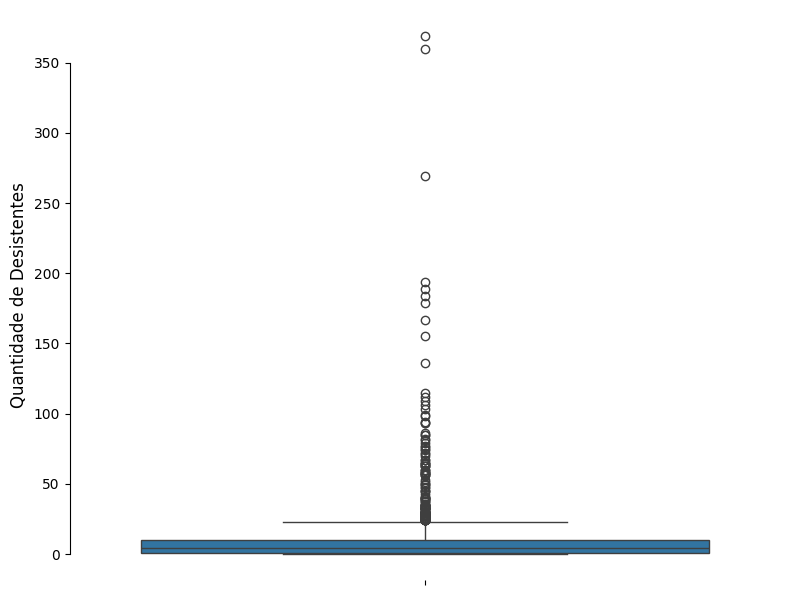

In [92]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
sns.boxplot(y=df['Quantidade de Desistência no Curso no ano de referência']) # 'y=' indica que é um boxplot vertical

plt.ylabel('Quantidade de Desistentes', fontsize=12)
sns.despine(trim=True) # Remove as "espinhas" e corta no limite dos dados
plt.tight_layout()
plt.show()


In [101]:
alpha = 0.05
resultados_shapiro = []

def run_shapiro_test(column_name, data_series, alpha_level):
    stat, p = shapiro(data_series)
    if p > alpha_level:
        result_text = f"Não rejeitamos H0 (p > {alpha_level}). Distribuição pode ser normal."
    else:
        result_text = f"Rejeitamos H0 (p <= {alpha_level}). Distribuição NÃO é normal."

    resultados_shapiro.append({
        'Variável': column_name,
        'Estatística W': f'{stat:.4f}',
        'Valor-p': f'{p:.4e}',
        'Resultado (α=0.05)': result_text
    })

run_shapiro_test('Quantidade de Ingressantes no Curso', df['Quantidade de Ingressantes no Curso'], alpha)
run_shapiro_test('Quantidade de Concluintes no Curso', df['Quantidade de Concluintes no Curso no ano de referência'], alpha)
run_shapiro_test('Quantidade de Desistência no Curso no ano de referência', df['Quantidade de Desistência no Curso no ano de referência'], alpha)

df_resultados_shapiro = pd.DataFrame(resultados_shapiro)

print("\n--- Tabela de Teste de Normalidade de Shapiro-Wilk ---")
styled_table = df_resultados_shapiro.style \
    .set_caption("Resultados do Teste de Normalidade de Shapiro-Wilk (α = 0.05)") \
    .set_properties(**{'text-align': 'left'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]} # Centraliza o conteúdo das células de dados
    ])

display(styled_table)


--- Tabela de Teste de Normalidade de Shapiro-Wilk ---


,Variável,Estatística W,Valor-p,Resultado (α=0.05)
0,Quantidade de Ingressantes no Curso,0.4395,8.6319e-61,Rejeitamos H0 (p <= 0.05). Distribuição NÃO é normal.
1,Quantidade de Concluintes no Curso,0.3718,7.0191e-63,Rejeitamos H0 (p <= 0.05). Distribuição NÃO é normal.
2,Quantidade de Desistência no Curso no ano de referência,0.3735,7.8952e-63,Rejeitamos H0 (p <= 0.05). Distribuição NÃO é normal.
